# **About**

Xente is an e-commerce and financial service app serving 10,000+ customers in Uganda.

This dataset includes a sample of approximately 140,000 transactions that occurred between 15 November 2018 and 15 March 2019.

One of the challenges of fraud detection problems is that the data is highly imbalanced. See these blogs for examples on how imbalanced data might be handled:

https://medium.com/coinmonks/handling-imbalanced-datasets-predicting-credit-card-fraud-544f5e74e0fd
https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#set to display all the columsn
pd.set_option('display.max_columns', 80)

In [3]:
feautures = pd.read_csv('Xente_Variable_Definitions.csv')
feautures

,Column Name,Definition
0,TransactionId,Unique �transaction identifier on platform
1,BatchId,Unique number assigned to a batch of transacti...
2,AccountId,Unique number identifying the customer on plat...
3,SubscriptionId,Unique number identifying the customer subscri...
4,CustomerId,Unique identifier attached to Account
5,CurrencyCode,Country currency
6,CountryCode,Numerical geographical code of country
7,ProviderId,Source provider of Item �bought.
8,ProductId,Item name being bought.
9,ProductCategory,ProductIds are organized into these broader pr...


In [4]:
df = pd.read_csv('Xente_Training.csv')
df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0


In [5]:
dftest = pd.read_csv('xente_test.csv', parse_dates=['TransactionStartTime'])
dftest

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13 10:01:40+00:00,4
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13 10:02:12+00:00,2
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13 10:02:30+00:00,2
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13 10:02:38+00:00,4
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13 10:02:58+00:00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45014,TransactionId_116198,BatchId_117348,AccountId_4841,SubscriptionId_3829,CustomerId_5225,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_3,-5000.0,5000,2019-03-14 23:56:28+00:00,2
45015,TransactionId_24829,BatchId_53630,AccountId_4803,SubscriptionId_1738,CustomerId_5272,UGX,256,ProviderId_3,ProductId_10,airtime,ChannelId_3,10000.0,10000,2019-03-14 23:57:38+00:00,1
45016,TransactionId_102920,BatchId_112209,AccountId_4817,SubscriptionId_4613,CustomerId_5286,UGX,256,ProviderId_3,ProductId_10,airtime,ChannelId_3,10000.0,10000,2019-03-14 23:59:17+00:00,1
45017,TransactionId_128439,BatchId_58734,AccountId_4841,SubscriptionId_3829,CustomerId_5286,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_3,-5000.0,5000,2019-03-14 23:59:39+00:00,2


In [6]:
df.shape,df

((95662, 16),
               TransactionId         BatchId       AccountId  \
 0       TransactionId_76871   BatchId_36123  AccountId_3957   
 1       TransactionId_73770   BatchId_15642  AccountId_4841   
 2       TransactionId_26203   BatchId_53941  AccountId_4229   
 3         TransactionId_380  BatchId_102363   AccountId_648   
 4       TransactionId_28195   BatchId_38780  AccountId_4841   
 ...                     ...             ...             ...   
 95657   TransactionId_89881   BatchId_96668  AccountId_4841   
 95658   TransactionId_91597    BatchId_3503  AccountId_3439   
 95659   TransactionId_82501  BatchId_118602  AccountId_4841   
 95660  TransactionId_136354   BatchId_70924  AccountId_1346   
 95661   TransactionId_35670   BatchId_29317  AccountId_4841   
 
             SubscriptionId       CustomerId CurrencyCode  CountryCode  \
 0       SubscriptionId_887  CustomerId_4406          UGX          256   
 1      SubscriptionId_3829  CustomerId_4406          UGX          2

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [8]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45019 entries, 0 to 45018
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         45019 non-null  object             
 1   BatchId               45019 non-null  object             
 2   AccountId             45019 non-null  object             
 3   SubscriptionId        45019 non-null  object             
 4   CustomerId            45019 non-null  object             
 5   CurrencyCode          45019 non-null  object             
 6   CountryCode           45019 non-null  int64              
 7   ProviderId            45019 non-null  object             
 8   ProductId             45019 non-null  object             
 9   ProductCategory       45019 non-null  object             
 10  ChannelId             45019 non-null  object             
 11  Amount                45019 non-null  float64            
 12  Valu

In [9]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [10]:
#checking for missing value
df.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

In [11]:
dftest.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
dtype: int64

In [12]:
#we need to convert the TransactionStartTime column to datetime object 

df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
df['TransactionStartTime']

0       2018-11-15 02:18:49+00:00
1       2018-11-15 02:19:08+00:00
2       2018-11-15 02:44:21+00:00
3       2018-11-15 03:32:55+00:00
4       2018-11-15 03:34:21+00:00
                   ...           
95657   2019-02-13 09:54:09+00:00
95658   2019-02-13 09:54:25+00:00
95659   2019-02-13 09:54:35+00:00
95660   2019-02-13 10:01:10+00:00
95661   2019-02-13 10:01:28+00:00
Name: TransactionStartTime, Length: 95662, dtype: datetime64[ns, UTC]

In [13]:
df['Day'] = pd. to_datetime(df['TransactionStartTime'], format='%D'). dt.day
df['Month'] = pd. to_datetime(df['TransactionStartTime'], format='%M'). dt.month
df['Year'] = pd. to_datetime(df['TransactionStartTime'], format='%Y'). dt.year
df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Day,Month,Year
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,15,11,2018
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,15,11,2018
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0,15,11,2018
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,15,11,2018
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,15,11,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13 09:54:09+00:00,2,0,13,2,2019
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13 09:54:25+00:00,2,0,13,2,2019
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13 09:54:35+00:00,2,0,13,2,2019
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13 10:01:10+00:00,2,0,13,2,2019


In [14]:
dftest['TransactionStartTime'] = pd.to_datetime(dftest['TransactionStartTime'])
dftest['TransactionStartTime']

0       2019-02-13 10:01:40+00:00
1       2019-02-13 10:02:12+00:00
2       2019-02-13 10:02:30+00:00
3       2019-02-13 10:02:38+00:00
4       2019-02-13 10:02:58+00:00
                   ...           
45014   2019-03-14 23:56:28+00:00
45015   2019-03-14 23:57:38+00:00
45016   2019-03-14 23:59:17+00:00
45017   2019-03-14 23:59:39+00:00
45018   2019-03-14 23:59:51+00:00
Name: TransactionStartTime, Length: 45019, dtype: datetime64[ns, UTC]

In [15]:
dftest['Day'] = pd. to_datetime(dftest['TransactionStartTime'], format='%D'). dt.day
dftest['Month'] = pd. to_datetime(dftest['TransactionStartTime'], format='%M'). dt.month
dftest['Year'] = pd. to_datetime(dftest['TransactionStartTime'], format='%Y'). dt.year
dftest

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,Day,Month,Year
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13 10:01:40+00:00,4,13,2,2019
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13 10:02:12+00:00,2,13,2,2019
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13 10:02:30+00:00,2,13,2,2019
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13 10:02:38+00:00,4,13,2,2019
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13 10:02:58+00:00,2,13,2,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45014,TransactionId_116198,BatchId_117348,AccountId_4841,SubscriptionId_3829,CustomerId_5225,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_3,-5000.0,5000,2019-03-14 23:56:28+00:00,2,14,3,2019
45015,TransactionId_24829,BatchId_53630,AccountId_4803,SubscriptionId_1738,CustomerId_5272,UGX,256,ProviderId_3,ProductId_10,airtime,ChannelId_3,10000.0,10000,2019-03-14 23:57:38+00:00,1,14,3,2019
45016,TransactionId_102920,BatchId_112209,AccountId_4817,SubscriptionId_4613,CustomerId_5286,UGX,256,ProviderId_3,ProductId_10,airtime,ChannelId_3,10000.0,10000,2019-03-14 23:59:17+00:00,1,14,3,2019
45017,TransactionId_128439,BatchId_58734,AccountId_4841,SubscriptionId_3829,CustomerId_5286,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_3,-5000.0,5000,2019-03-14 23:59:39+00:00,2,14,3,2019


In [16]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult,Day,Month,Year
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018,15.902898,6.566233,2018.497115
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872,8.962822,5.224310,0.499994
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000,1.000000,1.000000,2018.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000,8.000000,1.000000,2018.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000,16.000000,11.000000,2018.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000,24.000000,12.000000,2019.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000,31.000000,12.000000,2019.000000


In [17]:
# Check Cardinality

uniquedic = []

for col in dftest.columns:

  uniquetrain = len(df[col].unique())
  uniquetest = len(dftest[col].unique())
  uniquedic.append({'Total_Unique_Train' : uniquetrain,
                     'Cardinality%_Train': (uniquetrain/95662)*100,
                     'Total_Unique_Test' : uniquetest,
                     'Cardinality%_Test': (uniquetest/45019)*100})


uniquedf = pd.DataFrame(uniquedic, index = dftest.columns).sort_values(by = 'Cardinality%_Train', ascending = False)
uniquedf

,Total_Unique_Train,Cardinality%_Train,Total_Unique_Test,Cardinality%_Test
TransactionId,95662,100.000000,45019,100.000000
BatchId,94809,99.108319,44684,99.255870
TransactionStartTime,94556,98.843846,44018,97.776494
CustomerId,3742,3.911689,5018,11.146405
AccountId,3633,3.797746,2471,5.488794
SubscriptionId,3627,3.791474,2470,5.486572
Amount,1676,1.752002,998,2.216842
Value,1517,1.585792,944,2.096892
Day,31,0.032406,28,0.062196
ProductId,23,0.024043,26,0.057753


In [18]:
df.ChannelId.value_counts()

ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: ChannelId, dtype: int64

In [19]:
dftest.ChannelId.value_counts()

ChannelId_3    38090
ChannelId_2     6198
ChannelId_5      602
ChannelId_1      102
ChannelId_4       27
Name: ChannelId, dtype: int64

In [20]:
df.Year.value_counts()

2018    48107
2019    47555
Name: Year, dtype: int64

In [21]:
dftest.Year.value_counts()

2019    45019
Name: Year, dtype: int64

In [22]:
df.Month.value_counts()

12    35635
1     31783
2     15772
11    12472
Name: Month, dtype: int64

In [23]:
dftest.Month.value_counts()

2    23653
3    21366
Name: Month, dtype: int64

## **- Notes on the features to be used:**

**1. TransactionId:** Unique transaction identifier on platform, shows **high cardinality**, *won't be used*.

**2. BatchId:**	Unique number assigned to a batch of transactions for processing, shows **high cardinality**, *won't be used*.

**3. AccountId:**	Unique number identifying the customer on platform, shows **high cardinality**, *won't be used*.

**4. SubscriptionId:**	Unique number identifying the customer subscription, shows **high cardinality**, *won't be used*.

**5. CustomerId:** Unique identifier attached to Account.

  - Although it shows high cardinality, but it's low (3742) compared with the total datset (95662).
  - we think that customer Id is** important as a feature** as customers behavior differ.
  - But using **dummies is not appropriate** cause the number of unique values differ from the test dataset (5018) resulting in an error when predicting the test dataset.
  - the second option is to convert it into numerical values but this won't be also appropriate cause IDs is not a quantitative data, it's a **nominal data**, 
  - So *won't be used* too.

**6. CurrencyCode:**	Country currency, only **one unique value** in the whole data set so *won't be used*.

**7. CountryCode:**	Numerical geographical code of country, only **one unique value** in the whole data set so *won't be used*.

**8. ProviderId:**	Source provider of Item bought, this is of **no benefit** in Fraud detection, so *won't be used*.

**9. ProductId:** Item name being bought. 
  - We can see that **unique values** in our dataframe and the test datarame are **different**.
  - so getting **dummies** resulted in an **error**.
  - Thus we will use the *product category instead*.

**10. ProductCategory:**	ProductIds are organized into these broader product categories, **will be used in our model**.

**11. ChannelId:**	Identifies if customer used web,Android, IOS, pay later or checkout. 
  - We can see that **unique values** in our dataframe and the test datarame are **different** (4 Vs 5).
  - So getting **dummies** resulted in an **error**.
  - But this feature is **important**, so we **will use it as numerical** (from 1 to 5).

**12. Amount:**	Value of the transaction. Positive for debits from customer account and negative for credit into customer account. 
  - We will make a new column with **binary categories** either (debit or credit) based on the sign of the amount instead of using the amount feature.
  - we will use the 'value' feature instead.

**13. Value:**	Absolute value of the amount, **will be used in our model**.

**14. TransactionStartTime:**	Transaction start time which is specific for each transaction.
- Although the time between every transaction is **importatnt** but we can't use this feature that shows **very high cardianlity**.
- we will **extract** day, month, year.
- In *Future plans* we could extract the **time elapsed** between transactions per each customer.

**15. PricingStrategy:**	Category of Xente's pricing structure for merchants.
  - Although it's a numerical data but we will **get dummies** as this is mainly categorical.

In [24]:
# Creating new column for type of transaction either debit or credit

def transactiontype(val):
    if val < 0 :
        return'Credit'
    elif val > 0 : 
        return'Debit'
df['transaction'] = df['Amount'].map(transactiontype)
dftest['transaction'] = dftest['Amount'].map(transactiontype)
df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Day,Month,Year,transaction
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,15,11,2018,Debit
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,15,11,2018,Credit
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0,15,11,2018,Debit
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,15,11,2018,Debit
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,15,11,2018,Credit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13 09:54:09+00:00,2,0,13,2,2019,Credit
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13 09:54:25+00:00,2,0,13,2,2019,Debit
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13 09:54:35+00:00,2,0,13,2,2019,Credit
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13 10:01:10+00:00,2,0,13,2,2019,Debit


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         95662 non-null  object             
 1   BatchId               95662 non-null  object             
 2   AccountId             95662 non-null  object             
 3   SubscriptionId        95662 non-null  object             
 4   CustomerId            95662 non-null  object             
 5   CurrencyCode          95662 non-null  object             
 6   CountryCode           95662 non-null  int64              
 7   ProviderId            95662 non-null  object             
 8   ProductId             95662 non-null  object             
 9   ProductCategory       95662 non-null  object             
 10  ChannelId             95662 non-null  object             
 11  Amount                95662 non-null  float64            
 12  Valu

In [26]:
df.transaction.unique()

array(['Debit', 'Credit'], dtype=object)

In [27]:
# When get dummies for channel_id, we could see that the test dataset contains more unique values (5 vs 4), so we faced an error
# ValueError: X has 24 features, but LogisticRegression is expecting 23 features as input.
# That's why will change it into numbers
# The new colum is labeled ChannelID
ChannelID = df["ChannelId"].str.split("_", n = 1, expand = True)

df["ChannelId"]= ChannelID[1].astype(int)

df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Day,Month,Year,transaction
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,15,11,2018,Debit
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,15,11,2018,Credit
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,3,500.0,500,2018-11-15 02:44:21+00:00,2,0,15,11,2018,Debit
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,15,11,2018,Debit
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,15,11,2018,Credit


In [28]:
ChannelID = dftest["ChannelId"].str.split("_", n = 1, expand = True)
dftest["ChannelId"]= ChannelID[1].astype(int)

dftest.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,Day,Month,Year,transaction
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,3,1000.0,1000,2019-02-13 10:01:40+00:00,4,13,2,2019,Debit
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,3,2000.0,2000,2019-02-13 10:02:12+00:00,2,13,2,2019,Debit
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,2,-50.0,50,2019-02-13 10:02:30+00:00,2,13,2,2019,Credit
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,3,3000.0,3000,2019-02-13 10:02:38+00:00,4,13,2,2019,Debit
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,2,-60.0,60,2019-02-13 10:02:58+00:00,2,13,2,2019,Credit


# **Step Two: Preprocessing**

In [29]:
df.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult', 'Day',
       'Month', 'Year', 'transaction'],
      dtype='object')

In [30]:
#split our Training data into target and feature
X = df[['CustomerId', 'ProductCategory', 'ChannelId', 'Value', 'PricingStrategy', 'transaction', 'Year', 'Month', 'Day']]
y= df['FraudResult']

In [31]:
#split into test and train data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

In [32]:

X_train.shape, X_test.shape,y_train.shape


((76529, 9), (19133, 9), (76529,))

In [33]:
X_train.columns

Index(['CustomerId', 'ProductCategory', 'ChannelId', 'Value',
       'PricingStrategy', 'transaction', 'Year', 'Month', 'Day'],
      dtype='object')

In [34]:
X_test.columns

Index(['CustomerId', 'ProductCategory', 'ChannelId', 'Value',
       'PricingStrategy', 'transaction', 'Year', 'Month', 'Day'],
      dtype='object')

In [35]:
#Extraxt the categorical features so we can handle them separately from the numerical 
categorical = [var for var in X_train.columns if df[var].dtype=='O']

print('There are {} categorical variabes \n'.format(len(categorical)))

print('They are: ', categorical)

There are 3 categorical variabes 

They are:  ['CustomerId', 'ProductCategory', 'transaction']


In [36]:
df[categorical].head()

,CustomerId,ProductCategory,transaction
0,CustomerId_4406,airtime,Debit
1,CustomerId_4406,financial_services,Credit
2,CustomerId_4683,airtime,Debit
3,CustomerId_988,utility_bill,Debit
4,CustomerId_988,financial_services,Credit


In [37]:
#check formissing data 
X_train[categorical].isnull().sum()

CustomerId         0
ProductCategory    0
transaction        0
dtype: int64

In [38]:
#check for cardinality 

for var in categorical:
    print(var, 'contains', len(df[var].unique()), 'unique values')

CustomerId contains 3742 unique values
ProductCategory contains 9 unique values
transaction contains 2 unique values


##### Numerical Columns

In [39]:
numerical = [var for var in X_train.columns if df[var].dtype!='O']

print('There are {} numerical variabes \n'.format(len(numerical)))

print('They are: ', numerical)

There are 6 numerical variabes 

They are:  ['ChannelId', 'Value', 'PricingStrategy', 'Year', 'Month', 'Day']


In [40]:
# we will drop 'PricingStrategy' from numerical list as we will deal with it as a categorical feature.

numerical.remove('PricingStrategy')
numerical

['ChannelId', 'Value', 'Year', 'Month', 'Day']

In [41]:
X_train[numerical].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76529 entries, 66339 to 68268
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChannelId  76529 non-null  int32
 1   Value      76529 non-null  int64
 2   Year       76529 non-null  int64
 3   Month      76529 non-null  int64
 4   Day        76529 non-null  int64
dtypes: int32(1), int64(4)
memory usage: 3.2 MB


In [42]:
X_train[numerical].head()

,ChannelId,Value,Year,Month,Day
66339,2,50,2019,1,20
87279,3,1000,2019,2,6
40582,3,16650,2018,12,26
58655,2,1000,2019,1,12
87335,2,50,2019,2,6


In [43]:
X_train[numerical].isnull().sum()

ChannelId    0
Value        0
Year         0
Month        0
Day          0
dtype: int64

In [44]:
X_train[numerical].describe()

,ChannelId,Value,Year,Month,Day
count,76529.000000,7.652900e+04,76529.000000,76529.000000,76529.000000
mean,2.623189,1.012263e+04,2018.497027,6.567367,15.894994
std,0.558712,1.270795e+05,0.499994,5.225178,8.964848
min,1.000000,2.000000e+00,2018.000000,1.000000,1.000000
25%,2.000000,3.500000e+02,2018.000000,1.000000,8.000000
50%,3.000000,1.000000e+03,2018.000000,11.000000,16.000000
75%,3.000000,5.000000e+03,2019.000000,12.000000,24.000000
max,5.000000,9.880000e+06,2019.000000,12.000000,31.000000


<Figure size 1080x720 with 0 Axes>

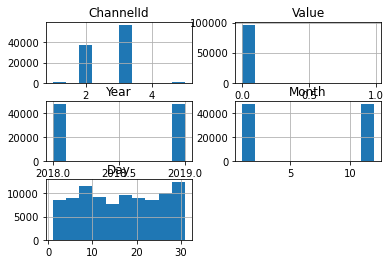

In [45]:
plt.figure(figsize=(15,10) )

histogram = df.hist(column=['ChannelId', 'Value','Year', 'Month','Day'])

In [46]:
categorical_1 = [col for col in X_train.columns if X_train[col].dtypes =='O']
categorical_1

['CustomerId', 'ProductCategory', 'transaction']

**Get dummies for categorical features**

*We will drop Customer ID since using dummies for this feature is not appropriate. this is because the number of unique feature differ from the ones in the test dataset*
*we are also not predicting for each customer*

In [47]:
X_train = pd.concat([X_train[numerical],  
                    pd.get_dummies(X_train.ProductCategory),
                    pd.get_dummies(X_train.PricingStrategy),
                    pd.get_dummies(X_train.transaction)],
                    axis =1)

In [48]:
X_train

,ChannelId,Value,Year,Month,Day,airtime,data_bundles,financial_services,movies,other,ticket,transport,tv,utility_bill,0,1,2,4,Credit,Debit
66339,2,50,2019,1,20,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
87279,3,1000,2019,2,6,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
40582,3,16650,2018,12,26,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
58655,2,1000,2019,1,12,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
87335,2,50,2019,2,6,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,3,2000,2018,12,8,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
45891,2,50,2018,12,29,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
42613,3,1500,2018,12,27,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
43567,3,2000,2018,12,28,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [49]:
X_test = pd.concat([X_test[numerical],  
                    pd.get_dummies(X_test.ProductCategory),
                    pd.get_dummies(X_test.PricingStrategy),
                    pd.get_dummies(X_test.transaction)],
                    axis =1)

In [50]:
# Get column names to be used after standardization
cols_train = X_train.columns
cols_train

Index([         'ChannelId',              'Value',               'Year',
                    'Month',                'Day',            'airtime',
             'data_bundles', 'financial_services',             'movies',
                    'other',             'ticket',          'transport',
                       'tv',       'utility_bill',                    0,
                          1,                    2,                    4,
                   'Credit',              'Debit'],
      dtype='object')

In [51]:
cols_test = X_test.columns
cols_test

Index([         'ChannelId',              'Value',               'Year',
                    'Month',                'Day',            'airtime',
             'data_bundles', 'financial_services',             'movies',
                    'other',             'ticket',          'transport',
                       'tv',       'utility_bill',                    0,
                          1,                    2,                    4,
                   'Credit',              'Debit'],
      dtype='object')

In [52]:
X_test

,ChannelId,Value,Year,Month,Day,airtime,data_bundles,financial_services,movies,other,ticket,transport,tv,utility_bill,0,1,2,4,Credit,Debit
69075,3,2000,2019,1,23,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
65709,3,1110,2019,1,19,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
5430,3,2000,2018,11,22,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
82375,2,1000,2019,2,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
60896,3,1000,2019,1,15,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68006,3,2000,2019,1,22,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
80436,2,5000,2019,2,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
82397,3,1900,2019,2,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
75187,3,1000,2019,1,27,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

C:\Users\esther.mwangi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\esther.mwangi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\esther.mwangi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\esther.mwangi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.wa

In [54]:
X_test

array([[5.00000000e-01, 2.02618710e-04, 1.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [5.00000000e-01, 1.12363128e-04, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [5.00000000e-01, 2.02618710e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [5.00000000e-01, 1.92477633e-04, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [5.00000000e-01, 1.01207944e-04, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [5.00000000e-01, 2.02618710e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [55]:
X_train

array([[2.50000000e-01, 4.85830058e-06, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.00000000e-01, 1.01012166e-04, 1.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [5.00000000e-01, 1.68502058e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [5.00000000e-01, 1.51619464e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [5.00000000e-01, 2.02226762e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [5.00000000e-01, 1.01012166e-04, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [56]:
X_train = pd.DataFrame(X_train, columns=[cols_train])
X_train

,ChannelId,Value,Year,Month,Day,airtime,data_bundles,financial_services,movies,other,ticket,transport,tv,utility_bill,0,1,2,4,Credit,Debit
0,0.25,0.000005,1.0,0.000000,0.633333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.50,0.000101,1.0,0.090909,0.166667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.50,0.001685,0.0,1.000000,0.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.25,0.000101,1.0,0.000000,0.366667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.25,0.000005,1.0,0.090909,0.166667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76524,0.50,0.000202,0.0,1.000000,0.233333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
76525,0.25,0.000005,0.0,1.000000,0.933333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
76526,0.50,0.000152,0.0,1.000000,0.866667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
76527,0.50,0.000202,0.0,1.000000,0.900000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [57]:
X_test = pd.DataFrame(X_test, columns=[cols_test])
X_test

,ChannelId,Value,Year,Month,Day,airtime,data_bundles,financial_services,movies,other,ticket,transport,tv,utility_bill,0,1,2,4,Credit,Debit
0,0.50,0.000203,1.0,0.000000,0.733333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.50,0.000112,1.0,0.000000,0.600000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.50,0.000203,0.0,0.909091,0.700000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.25,0.000101,1.0,0.090909,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.50,0.000101,1.0,0.000000,0.466667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19128,0.50,0.000203,1.0,0.000000,0.700000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
19129,0.25,0.000507,1.0,0.090909,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
19130,0.50,0.000192,1.0,0.090909,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
19131,0.50,0.000101,1.0,0.000000,0.866667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [58]:
y_train.isnull().sum()

0

# **Step Three: Logistic Model Training**


In [59]:
#Model training 
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state=0)

logreg.fit(X_train, y_train)

C:\Users\esther.mwangi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression(random_state=0, solver='liblinear')

In [60]:
#test data
y_pred_test = logreg.predict(X_test)

C:\Users\esther.mwangi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [61]:
y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
logreg.predict_proba(X_test)[:,0]

C:\Users\esther.mwangi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([0.99843535, 0.99962834, 0.99976556, ..., 0.9903141 , 0.99965432,
       0.99975692])

In [63]:
#probability of getting 1, i.e , fraud
logreg.predict_proba(X_test.values)[:,1]

array([0.00156465, 0.00037166, 0.00023444, ..., 0.0096859 , 0.00034568,
       0.00024308])

# **Step Four: Validation Metrics**

In [64]:
print('Training set score: ', logreg.score(X_train.values, y_train.values))

print('Test set score: ', logreg.score(X_test.values, y_test.values))

Training set score:  0.9982228958956736
Test set score:  0.9984320284325511


In [65]:
#check null accuracy 
y_test.value_counts()

0    19098
1       35
Name: FraudResult, dtype: int64

In [66]:
#check null accuracy 
# our dataset is highly imbalanced, null accuracy is almost the same as our accuracy

null_acuracy = 19098/(len(y_test))
null_acuracy

0.9981706998379762

In [67]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, y_pred_test)

In [68]:
cm

array([[19098,     0],
       [   30,     5]], dtype=int64)

In [69]:
print('True positives (TP) = ', cm[0,0])
print('False positives (FP)= ', cm[0, 1])
print('False Negatives (FN)= ', cm[1, 0])
print('True Negatives (TN))= ', cm[1, 1])

True positives (TP) =  19098
False positives (FP)=  0
False Negatives (FN)=  30
True Negatives (TN))=  5


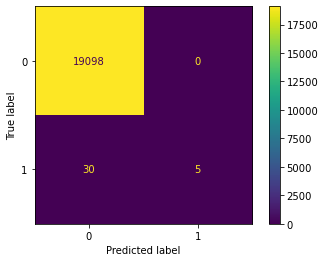

In [70]:
#visualze with heatmap

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)

disp.plot();

In [71]:
# Classification Report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19098
           1       1.00      0.14      0.25        35

    accuracy                           1.00     19133
   macro avg       1.00      0.57      0.62     19133
weighted avg       1.00      1.00      1.00     19133



In [72]:
#probability of getting 1, i.e , Fraud
#probability of getting 0, i.e , no Fraud

y_predF = logreg.predict_proba(X_test.values)[:,1]
y_predNF = logreg.predict_proba(X_test.values)[:,0]

In [73]:
y_predF

array([0.00156465, 0.00037166, 0.00023444, ..., 0.0096859 , 0.00034568,
       0.00024308])

In [74]:
y_predNF

array([0.99843535, 0.99962834, 0.99976556, ..., 0.9903141 , 0.99965432,
       0.99975692])

In [75]:
# Plot ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_predF, pos_label=1)

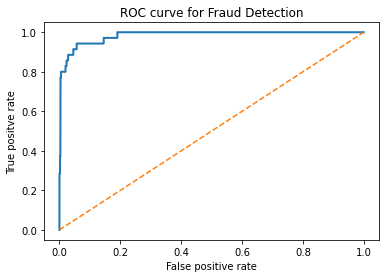

In [76]:
plt.figure(figsize = (6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], '--')
plt.title('ROC curve for Fraud Detection')
plt.xlabel('False positive rate')
plt.ylabel('True positve rate')
plt.show()

In [77]:
#computing AUC 

from sklearn.metrics import roc_auc_score

ROCAUC = roc_auc_score(y_test, y_predF)

print(ROCAUC)

0.9837656897506095


# **Step Five: Prediction of df_test**

In [78]:
dftest.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,Day,Month,Year,transaction
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,3,1000.0,1000,2019-02-13 10:01:40+00:00,4,13,2,2019,Debit
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,3,2000.0,2000,2019-02-13 10:02:12+00:00,2,13,2,2019,Debit
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,2,-50.0,50,2019-02-13 10:02:30+00:00,2,13,2,2019,Credit
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,3,3000.0,3000,2019-02-13 10:02:38+00:00,4,13,2,2019,Debit
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,2,-60.0,60,2019-02-13 10:02:58+00:00,2,13,2,2019,Credit


In [79]:
Xdftest = dftest[['CustomerId', 'ProductCategory', 'ChannelId', 'Value', 'PricingStrategy', 'transaction', 'Year', 'Month', 'Day']]


Xdftest = pd.concat([Xdftest[['ChannelId','Value', 'Year', 'Month', 'Day']], 
                    pd.get_dummies(Xdftest.ProductCategory), 
                    pd.get_dummies(Xdftest.PricingStrategy),
                    pd.get_dummies(Xdftest.transaction)], 
                    axis =1)

In [80]:
Xcolsdftest = Xdftest.columns
Xcolsdftest

Index([         'ChannelId',              'Value',               'Year',
                    'Month',                'Day',            'airtime',
             'data_bundles', 'financial_services',             'movies',
                   'retail',             'ticket',          'transport',
                       'tv',       'utility_bill',                    0,
                          1,                    2,                    4,
                   'Credit',              'Debit'],
      dtype='object')

In [81]:
#feature scaling

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

Xdftest = scaler.fit_transform(Xdftest.values)


In [82]:
Xdftest

array([[5.00000000e-01, 1.05052654e-04, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [5.00000000e-01, 2.10315834e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.50000000e-01, 5.05263264e-06, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [5.00000000e-01, 1.05242127e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [5.00000000e-01, 5.26105374e-04, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.00000000e-01, 3.68210604e-04, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [83]:
Xdftest = pd.DataFrame(Xdftest, columns=[Xcolsdftest])

In [84]:
Xdftest

,ChannelId,Value,Year,Month,Day,airtime,data_bundles,financial_services,movies,retail,ticket,transport,tv,utility_bill,0,1,2,4,Credit,Debit
0,0.50,0.000105,0.0,0.0,0.444444,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.50,0.000210,0.0,0.0,0.444444,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.25,0.000005,0.0,0.0,0.444444,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.50,0.000316,0.0,0.0,0.444444,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.25,0.000006,0.0,0.0,0.444444,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45014,0.50,0.000526,0.0,1.0,0.481481,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
45015,0.50,0.001052,0.0,1.0,0.481481,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
45016,0.50,0.001052,0.0,1.0,0.481481,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
45017,0.50,0.000526,0.0,1.0,0.481481,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [85]:
#test data
ydftest = logreg.predict(Xdftest.values)
ydftest

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## **Prediction Results**

In [86]:
# Prediction results
new_df_test = pd.DataFrame(logreg.predict(Xdftest.values), index = dftest['TransactionId'])
new_df_test

,0
TransactionId,
TransactionId_50600,0
TransactionId_95109,0
TransactionId_47357,0
TransactionId_28185,0
TransactionId_22140,0
...,...
TransactionId_116198,0
TransactionId_24829,0
TransactionId_102920,0


In [87]:
new_df_test.value_counts(),y_test.value_counts()

(0    45015
 1        4
 dtype: int64,
 0    19098
 1       35
 Name: FraudResult, dtype: int64)